# Program Vectors: Code Vectorization

In order for a learning algorithm, like a Logistic Regression Model or a Support Vector Machine, to understand text, it needs to be converted into vectors of numbers. In short, text has to be encoded as numbers to be used as input or output for Machine Learning and Deep Learning models. For that, a suite of NLP techniques are employed. In our case, code submissions or programs cannot be considered as natural language and need to be parsed and analysed in a different way. We explored  the following  representations of  programming submissions by tokenizing the code:

## 1) Programs as word vectors

First, we are going to treat the programs students write and submit to our platform as word vectors:

In [1]:
import re
def remove_comments(text):
    return re.sub(re.compile('#.*?\n'), '', text)

In [2]:
sum_code = '#!/usr/bin/env python\n\na = int(raw_input())\nb = int(raw_input())\n\nprint a + b\n\n\n'
remove_comments(sum_code)

'\na = int(raw_input())\nb = int(raw_input())\n\nprint a + b\n\n\n'

In [3]:
sum_code = '''
#!/usr/bin/env python
# read from input
a = int(raw_input()) # first
b = int(raw_input()) # second
print a + b
'''
remove_comments(sum_code)

'\na = int(raw_input()) b = int(raw_input()) print a + b\n'

**Keras**

Keras provides a more sophisticated API for preparing text that can be fit and reused to prepare multiple text documents. This may be the preferred approach for large projects.

Keras provides the Tokenizer class for preparing text documents for deep learning. The Tokenizer must be constructed and then fit on either raw text documents or integer encoded text documents.

https://machinelearningmastery.com/prepare-text-data-deep-learning-keras/

In [4]:
from keras.preprocessing.text import text_to_word_sequence

# text_to_word_sequence?

Using TensorFlow backend.


In [5]:
text_to_word_sequence(remove_comments(sum_code), lower=True, split=' ')

['a', 'int', 'raw', 'input', 'b', 'int', 'raw', 'input', 'print', 'a', 'b']

By default in text_to_word_sequence the filters are:

> filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'

See the function signature

In [6]:
text_to_word_sequence('''print "Hello, World"''', 
                      filters='\t\n',
                      lower=True, 
                      split=' ')

['print', '"hello,', 'world"']

In [7]:
text_to_word_sequence(remove_comments(sum_code), 
                      filters='\t\n',
                      lower=True, 
                      split=' ')

['a',
 '=',
 'int(raw_input())',
 'b',
 '=',
 'int(raw_input())',
 'print',
 'a',
 '+',
 'b']

In [8]:
function_code = '''#!/usr/bin/env python
def say_hello():
    print("Hello, World!")
say_hello()'''

In [9]:
text_to_word_sequence(remove_comments(function_code), 
                      filters='\t\n',
                      lower=True, 
                      split=' ')

['def', 'say_hello():', 'print("hello,', 'world!")', 'say_hello()']

In [10]:
# https://keras.io/preprocessing/text/#tokenizer
from keras.preprocessing.text import Tokenizer

# Tokenizer?

In [11]:
t = Tokenizer(num_words=None, 
              filters='\t\n', 
              lower=True, 
              split=' ', 
              char_level=False)

In [12]:
docs = [
    remove_comments(sum_code),
]

In [13]:
t.fit_on_texts(docs)

Once fit, the Tokenizer provides 4 attributes that you can use to query what has been learned about your documents:

- word_counts: A dictionary of words and their counts.
- word_docs: A dictionary of words and how many documents each appeared in.
- word_index: A dictionary of words and their uniquely assigned integers.
- document_count: An integer count of the total number of documents that were used to fit the Tokenizer.

In [14]:
t.word_counts

OrderedDict([('a', 2),
             ('=', 2),
             ('int(raw_input())', 2),
             ('b', 2),
             ('print', 1),
             ('+', 1)])

In [15]:
print ('Number docs', t.document_count)

('Number docs', 1)


In [16]:
t.word_index

{'+': 6, '=': 2, 'a': 1, 'b': 4, 'int(raw_input())': 3, 'print': 5}

In [17]:
t.word_docs

{'+': 1, '=': 1, 'a': 1, 'b': 1, 'int(raw_input())': 1, 'print': 1}

In [18]:
# integer encode documents
encoded_docs = t.texts_to_matrix(docs, mode='count')

In [19]:
# t.texts_to_matrix?

In [20]:
encoded_docs

array([[ 0.,  2.,  2.,  2.,  2.,  1.,  1.]])

It still does not represent a programming submission in a very comparable way to other submissions that have different variable names and so on

## 2) Programs as Python tokens

* https://docs.python.org/3/library/tokenize.html
* https://docs.python.org/3/library/token.html
* Code: https://github.com/python/cpython/blob/3.7/Lib/tokenize.py
* Code: https://github.com/python/cpython/blob/3.7/Lib/token.py
* C code: https://github.com/python/cpython/blob/master/Parser/tokenizer.c
* C library: https://github.com/python/cpython/blob/master/Include/token.h

Intead of words, we are going to convert code to tokens:

In [21]:
import sys
from tokenize import generate_tokens
from StringIO import StringIO

In [22]:
from tokenize import LPAR, OP, Funny, AMPER, AMPEREQUAL, any, AT, Comment, COMMENT

print LPAR 
print OP
print AT
print Funny
print COMMENT
print Comment

7
51
50
((\*\*=?|>>=?|<<=?|<>|!=|//=?|[+\-*/%&|^=<>]=?|~)|[][(){}]|(\r?\n|[:;.,`@]))
53
#[^\r\n]*


**Command line**

In [23]:
!cat data/examples/hello.py

def say_hello():
    print("Hello, World!")

say_hello()


In [24]:
!python -m tokenize data/examples/hello.py

1,0-1,3:	NAME	'def'
1,4-1,13:	NAME	'say_hello'
1,13-1,14:	OP	'('
1,14-1,15:	OP	')'
1,15-1,16:	OP	':'
1,16-1,17:	NEWLINE	'\n'
2,0-2,4:	INDENT	'    '
2,4-2,9:	NAME	'print'
2,9-2,10:	OP	'('
2,10-2,25:	STRING	'"Hello, World!"'
2,25-2,26:	OP	')'
2,26-2,27:	NEWLINE	'\n'
3,0-3,1:	NL	'\n'
4,0-4,0:	DEDENT	''
4,0-4,9:	NAME	'say_hello'
4,9-4,10:	OP	'('
4,10-4,11:	OP	')'
4,11-4,12:	NEWLINE	'\n'
5,0-5,0:	ENDMARKER	''


In [25]:
!python -m tokenize data/examples/hello_world.py

1,0-1,5:	NAME	'print'
1,6-1,20:	STRING	'"Hello, World"'
2,0-2,0:	ENDMARKER	''


In [26]:
!python -m tokenize data/examples/sum.py

1,0-1,21:	COMMENT	'#!/usr/bin/env python'
1,21-1,22:	NL	'\n'
2,0-2,1:	NL	'\n'
3,0-3,17:	COMMENT	'# read from input'
3,17-3,18:	NL	'\n'
4,0-4,1:	NAME	'a'
4,2-4,3:	OP	'='
4,4-4,7:	NAME	'int'
4,7-4,8:	OP	'('
4,8-4,17:	NAME	'raw_input'
4,17-4,18:	OP	'('
4,18-4,19:	OP	')'
4,19-4,20:	OP	')'
4,21-4,28:	COMMENT	'# first'
4,28-4,29:	NEWLINE	'\n'
5,0-5,1:	NAME	'b'
5,2-5,3:	OP	'='
5,4-5,7:	NAME	'int'
5,7-5,8:	OP	'('
5,8-5,17:	NAME	'raw_input'
5,17-5,18:	OP	'('
5,18-5,19:	OP	')'
5,19-5,20:	OP	')'
5,21-5,29:	COMMENT	'# second'
5,29-5,30:	NEWLINE	'\n'
6,0-6,1:	NL	'\n'
7,0-7,5:	NAME	'print'
7,6-7,7:	NAME	'a'
7,8-7,9:	OP	'+'
7,10-7,11:	NAME	'b'
7,11-7,12:	NEWLINE	'\n'
8,0-8,0:	ENDMARKER	''


**Programatically**

In [27]:
# generate_tokens?

In [28]:
hello_code = '''def say_hello():
    print("Hello, World!")

say_hello()'''

In [29]:
tokens = list(generate_tokens(StringIO(hello_code).readline))

In [30]:
def print_tokens(tokens):
    for t in tokens:
        print (str(t[0]) + "," + str(t[2][1]) + "-" + str(t[2][0]) + ',' + str(t[3][1]) + ':\t' + 
               str(t[0]) + '\t' + # id_to_token[t[0]]
               repr(str(t[1])))

In [31]:
print_tokens(tokens)

1,0-1,3:	1	'def'
1,4-1,13:	1	'say_hello'
51,13-1,14:	51	'('
51,14-1,15:	51	')'
51,15-1,16:	51	':'
4,16-1,17:	4	'\n'
5,0-2,4:	5	'    '
1,4-2,9:	1	'print'
51,9-2,10:	51	'('
3,10-2,25:	3	'"Hello, World!"'
51,25-2,26:	51	')'
4,26-2,27:	4	'\n'
54,0-3,1:	54	'\n'
6,0-4,0:	6	''
1,0-4,9:	1	'say_hello'
51,9-4,10:	51	'('
51,10-4,11:	51	')'
0,0-5,0:	0	''


In [32]:
# List of:
# Token code, Part of the line being analysed, FROM (line, character), TO (line, character), Complete line of code
tokens

[(1, 'def', (1, 0), (1, 3), 'def say_hello():\n'),
 (1, 'say_hello', (1, 4), (1, 13), 'def say_hello():\n'),
 (51, '(', (1, 13), (1, 14), 'def say_hello():\n'),
 (51, ')', (1, 14), (1, 15), 'def say_hello():\n'),
 (51, ':', (1, 15), (1, 16), 'def say_hello():\n'),
 (4, '\n', (1, 16), (1, 17), 'def say_hello():\n'),
 (5, '    ', (2, 0), (2, 4), '    print("Hello, World!")\n'),
 (1, 'print', (2, 4), (2, 9), '    print("Hello, World!")\n'),
 (51, '(', (2, 9), (2, 10), '    print("Hello, World!")\n'),
 (3, '"Hello, World!"', (2, 10), (2, 25), '    print("Hello, World!")\n'),
 (51, ')', (2, 25), (2, 26), '    print("Hello, World!")\n'),
 (4, '\n', (2, 26), (2, 27), '    print("Hello, World!")\n'),
 (54, '\n', (3, 0), (3, 1), '\n'),
 (6, '', (4, 0), (4, 0), 'say_hello()'),
 (1, 'say_hello', (4, 0), (4, 9), 'say_hello()'),
 (51, '(', (4, 9), (4, 10), 'say_hello()'),
 (51, ')', (4, 10), (4, 11), 'say_hello()'),
 (0, '', (5, 0), (5, 0), '')]

This is a more interesting representation that abstracts away the variables names, types of operators, etc but it may be too general to see the differences in between the students' submissions

## 3) Programs as Abstract Syntax Trees

https://docs.python.org/3/library/ast.html

In [33]:
import ast

In [34]:
hello_code

'def say_hello():\n    print("Hello, World!")\n\nsay_hello()'

In [35]:
program_ast = ast.parse(hello_code)

In [36]:
program_ast

In [37]:
ast.dump(program_ast)

"Module(body=[FunctionDef(name='say_hello', args=arguments(args=[], vararg=None, kwarg=None, defaults=[]), body=[Print(dest=None, values=[Str(s='Hello, World!')], nl=True)], decorator_list=[]), Expr(value=Call(func=Name(id='say_hello', ctx=Load()), args=[], keywords=[], starargs=None, kwargs=None))])"

In [38]:
program_ast.body

[<_ast.FunctionDef at 0x1815e5e6d0>, <_ast.Expr at 0x1815e5e890>]

In [39]:
for statement in program_ast.body:
    print ast.dump(statement), '\n'

FunctionDef(name='say_hello', args=arguments(args=[], vararg=None, kwarg=None, defaults=[]), body=[Print(dest=None, values=[Str(s='Hello, World!')], nl=True)], decorator_list=[]) 

Expr(value=Call(func=Name(id='say_hello', ctx=Load()), args=[], keywords=[], starargs=None, kwargs=None)) 



In [40]:
class FunctionCallVisitor(ast.NodeVisitor):
    def visit_Call(self, node):
        print ast.dump(node)

FunctionCallVisitor().visit(program_ast)

Call(func=Name(id='say_hello', ctx=Load()), args=[], keywords=[], starargs=None, kwargs=None)


In [41]:
divisors_code = '''def divisors(n):
    for d in range(1, n + 1):
        if n % d == 0:
            print d'''

In [42]:
ast.dump(ast.parse(divisors_code))

"Module(body=[FunctionDef(name='divisors', args=arguments(args=[Name(id='n', ctx=Param())], vararg=None, kwarg=None, defaults=[]), body=[For(target=Name(id='d', ctx=Store()), iter=Call(func=Name(id='range', ctx=Load()), args=[Num(n=1), BinOp(left=Name(id='n', ctx=Load()), op=Add(), right=Num(n=1))], keywords=[], starargs=None, kwargs=None), body=[If(test=Compare(left=BinOp(left=Name(id='n', ctx=Load()), op=Mod(), right=Name(id='d', ctx=Load())), ops=[Eq()], comparators=[Num(n=0)]), body=[Print(dest=None, values=[Name(id='d', ctx=Load())], nl=True)], orelse=[])], orelse=[])], decorator_list=[])])"

### Extracting a representation of the tree

In [43]:
import graphviz
from IPython.display import SVG

def _strip_docstring(body):
    first = body[0]
    if isinstance(first, ast.Expr) and isinstance(first.value, ast.Str):
        return body[1:]
    return body

def _bold(label):
    return '<<B>{}</B>>'.format(label)

Extract a representation of the AST by using a BFS approach:

In [44]:
def get_ast_repr(node):
    
    visited = set()
    queue = [ [node, None, None, False] ]
    output = []
    
    while queue:
        
        vertex, value, name, end = queue.pop(0)
        
        # OUTPUT
        output.append(get_leaf(vertex, value, name, end))
        
        if vertex not in visited:
            
            visited.add(vertex)
            
            if hasattr(vertex, '_fields'):
                
                for field_name, field_value in zip(vertex._fields, 
                                               (getattr(vertex, attr) for attr in vertex._fields)):

                    if isinstance(field_value, ast.AST):
                        queue.append([field_value, field_name, vertex, False])
                    
                    elif isinstance(field_value, list):

                        if field_name == 'body':
                            field_name = _strip_docstring(field_value)
                        for item in field_value:
                            if isinstance(item, ast.AST):
                                queue.append([item, field_name, vertex, False])
                            else:
                                queue.append([item, field_name, vertex, True])

                    else:
                        queue.append((field_value, field_name, vertex, True))
                   
    return output

def get_leaf(node, value, parent, end):
    
    node_name = node.__class__.__name__
    node_name = next(node_name) if node_name is None else node_name
    if node_name == 'str': node_name = str(node)

    return {
        'Node': node, 
        'Parent': parent, 
        'Name': node_name,
        'Value': value,
        'End': end,
    }

In [45]:
hello_code

'def say_hello():\n    print("Hello, World!")\n\nsay_hello()'

In [46]:
tree = get_ast_repr(ast.parse(hello_code))

In [47]:
tree

[{'End': False,
  'Name': 'Module',
  'Node': <_ast.Module at 0x1815e5e750>,
  'Parent': None,
  'Value': None},
 {'End': False,
  'Name': 'FunctionDef',
  'Node': <_ast.FunctionDef at 0x1815e5e590>,
  'Parent': <_ast.Module at 0x1815e5e750>,
  'Value': [<_ast.FunctionDef at 0x1815e5e590>, <_ast.Expr at 0x1815e5ea10>]},
 {'End': False,
  'Name': 'Expr',
  'Node': <_ast.Expr at 0x1815e5ea10>,
  'Parent': <_ast.Module at 0x1815e5e750>,
  'Value': [<_ast.FunctionDef at 0x1815e5e590>, <_ast.Expr at 0x1815e5ea10>]},
 {'End': True,
  'Name': 'say_hello',
  'Node': 'say_hello',
  'Parent': <_ast.FunctionDef at 0x1815e5e590>,
  'Value': 'name'},
 {'End': False,
  'Name': 'arguments',
  'Node': <_ast.arguments at 0x1815e5ebd0>,
  'Parent': <_ast.FunctionDef at 0x1815e5e590>,
  'Value': 'args'},
 {'End': False,
  'Name': 'Print',
  'Node': <_ast.Print at 0x1815e5ef90>,
  'Parent': <_ast.FunctionDef at 0x1815e5e590>,
  'Value': [<_ast.Print at 0x1815e5ef90>]},
 {'End': False,
  'Name': 'Call',
  

In [48]:
def get_ast_pairs(tree):
    names = {}
    tuples = []
    for leaf in tree:
        # Values
        node = leaf['Node']
        node_name = leaf['Name']
        parent = leaf['Parent']
        value = leaf['Value']
        # Save name
        names[node] = node_name
        if node is None or parent is None:
            continue
        # Parent name
        parent_name = names[parent]
        # Add tuple
        tuples.append((parent_name, node_name))
    return tuples

In [49]:
pairs = get_ast_pairs(tree)

In [50]:
pairs

[('Module', 'FunctionDef'),
 ('Module', 'Expr'),
 ('FunctionDef', 'say_hello'),
 ('FunctionDef', 'arguments'),
 ('FunctionDef', 'Print'),
 ('Expr', 'Call'),
 ('Print', 'Str'),
 ('Print', 'bool'),
 ('Call', 'Name'),
 ('Str', 'Hello, World!'),
 ('Name', 'say_hello'),
 ('Name', 'Load')]

In [51]:
def graph(tree):
    
    graph = graphviz.Graph(format='svg')

    for d in tree:
        node = d['Node']
        if node is None:
            continue
        name = d['Name']
        end = d['End']
        if end:
            color = '#008040'
        else:
            color = '#004080'
        # Add Node
        graph.node(str(node), label=_bold(name), fontcolor=color)
        parent = d['Parent']
        if parent is not None:
            graph.edge(str(parent), str(node), sametail='t{}'.format(parent))

    graph.node_attr.update(dict(
        fontname='courier',
        shape='none',
    ))

    return SVG(graph.pipe(format='svg'))

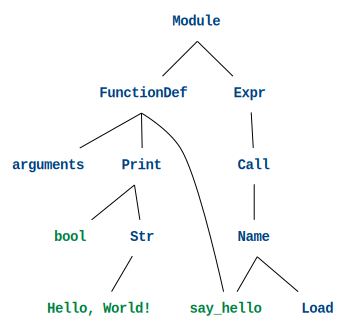

In [52]:
graph(tree)

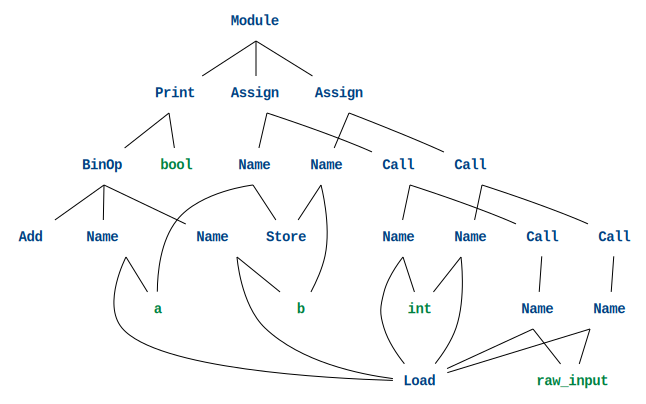

In [53]:
tree = get_ast_repr(ast.parse(sum_code))
graph(tree)

In [54]:
get_ast_pairs(tree)

[('Module', 'Assign'),
 ('Module', 'Assign'),
 ('Module', 'Print'),
 ('Assign', 'Name'),
 ('Assign', 'Call'),
 ('Assign', 'Name'),
 ('Assign', 'Call'),
 ('Print', 'BinOp'),
 ('Print', 'bool'),
 ('Name', 'a'),
 ('Name', 'Store'),
 ('Call', 'Name'),
 ('Call', 'Call'),
 ('Name', 'b'),
 ('Name', 'Store'),
 ('Call', 'Name'),
 ('Call', 'Call'),
 ('BinOp', 'Name'),
 ('BinOp', 'Add'),
 ('BinOp', 'Name'),
 ('Name', 'int'),
 ('Name', 'Load'),
 ('Call', 'Name'),
 ('Name', 'int'),
 ('Name', 'Load'),
 ('Call', 'Name'),
 ('Name', 'a'),
 ('Name', 'Load'),
 ('Name', 'b'),
 ('Name', 'Load'),
 ('Name', 'raw_input'),
 ('Name', 'Load'),
 ('Name', 'raw_input'),
 ('Name', 'Load')]

In [55]:
hi_code = '''
def hello():
    """Return Hi."""
    return 'Hi!'
'''

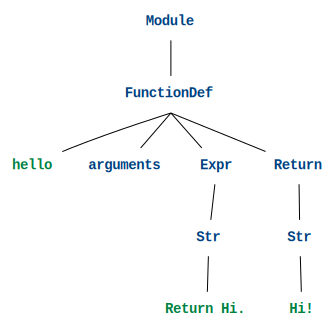

In [56]:
tree = get_ast_repr(ast.parse(hi_code))
graph(tree)

In [57]:
get_ast_pairs(tree)

[('Module', 'FunctionDef'),
 ('FunctionDef', 'hello'),
 ('FunctionDef', 'arguments'),
 ('FunctionDef', 'Expr'),
 ('FunctionDef', 'Return'),
 ('Expr', 'Str'),
 ('Return', 'Str'),
 ('Str', 'Return Hi.'),
 ('Str', 'Hi!')]

## Examples

In [58]:
program_a = '''
def get_name(name):
    print 'Hi %s' % (name)
    
get_name('David')
'''

In [59]:
program_sum = '''
#!/usr/bin/env python

# read from input
a = int(raw_input()) # first
b = int(raw_input()) # second

print a + b'''

In [60]:
program_score = '''
n = input()
i = 0
away_score = (away_goals * 3) + away_points
home_score = (home_goals * 3) + home_points 
while n < 4:
    n = input()
    if home_score > away_score :
        print "home win"
    elif home_score < away_score :
        print "away win"
    else:
        print "draw"
    i = i + 1
'''

In [61]:
program_codes = [
    program_a,
    program_sum,
    program_score
]

In [62]:
docs = [ remove_comments(p) for p in program_codes ]

In [63]:
t = Tokenizer(num_words=None, 
              filters='\t\n', 
              lower=True, 
              split=' ', 
              char_level=False)

In [64]:
t.fit_on_texts(docs)

In [65]:
t.word_counts

OrderedDict([('def', 1),
             ('get_name(name):', 1),
             ('print', 5),
             ("'hi", 1),
             ("%s'", 1),
             ('%', 1),
             ('(name)', 1),
             ("get_name('david')", 1),
             ('a', 2),
             ('=', 8),
             ('int(raw_input())', 2),
             ('b', 2),
             ('+', 4),
             ('n', 3),
             ('input()', 2),
             ('i', 3),
             ('0', 1),
             ('away_score', 3),
             ('(away_goals', 1),
             ('*', 2),
             ('3)', 2),
             ('away_points', 1),
             ('home_score', 3),
             ('(home_goals', 1),
             ('home_points', 1),
             ('while', 1),
             ('<', 2),
             ('4:', 1),
             ('if', 1),
             ('>', 1),
             (':', 2),
             ('"home', 1),
             ('win"', 2),
             ('elif', 1),
             ('"away', 1),
             ('else:', 1),
             ('"draw"',

In [66]:
t.texts_to_matrix(docs, mode='count')

array([[ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  2.,  1.,  1.,  0.,  0.,  0.,  0.,  2.,  2.,  2.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  6.,  3.,  3.,  3.,  3.,  3.,  3.,  0.,  0.,  0.,  2.,  2.,
         2.,  2.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

In [67]:
t.texts_to_matrix(docs, mode='tfidf')

array([[ 0.        ,  0.        ,  0.55961579,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.91629073,  0.91629073,  0.91629073,
         0.91629073,  0.91629073,  0.91629073,  0.91629073,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.17360019,  0.55961579,  0.69314718,  0.        ,
         0.        ,  0.        ,  0.        ,  1.55141507,  1.55141507,
         1.55141507,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.

In [68]:
!python -m tokenize data/examples/sum.py

1,0-1,21:	COMMENT	'#!/usr/bin/env python'
1,21-1,22:	NL	'\n'
2,0-2,1:	NL	'\n'
3,0-3,17:	COMMENT	'# read from input'
3,17-3,18:	NL	'\n'
4,0-4,1:	NAME	'a'
4,2-4,3:	OP	'='
4,4-4,7:	NAME	'int'
4,7-4,8:	OP	'('
4,8-4,17:	NAME	'raw_input'
4,17-4,18:	OP	'('
4,18-4,19:	OP	')'
4,19-4,20:	OP	')'
4,21-4,28:	COMMENT	'# first'
4,28-4,29:	NEWLINE	'\n'
5,0-5,1:	NAME	'b'
5,2-5,3:	OP	'='
5,4-5,7:	NAME	'int'
5,7-5,8:	OP	'('
5,8-5,17:	NAME	'raw_input'
5,17-5,18:	OP	'('
5,18-5,19:	OP	')'
5,19-5,20:	OP	')'
5,21-5,29:	COMMENT	'# second'
5,29-5,30:	NEWLINE	'\n'
6,0-6,1:	NL	'\n'
7,0-7,5:	NAME	'print'
7,6-7,7:	NAME	'a'
7,8-7,9:	OP	'+'
7,10-7,11:	NAME	'b'
7,11-7,12:	NEWLINE	'\n'
8,0-8,0:	ENDMARKER	''


In [69]:
!cat data/examples/score.py

n = input()
i = 0
away_score = (away_goals * 3) + away_points
home_score = (home_goals * 3) + home_points 
while n < 4:
    n = input()
    if home_score > away_score :
        print "home win"
    elif home_score < away_score :
        print "away win"
    else:
        print "draw"
    i = i + 1


In [70]:
!python -m tokenize data/examples/score.py

1,0-1,1:	NAME	'n'
1,2-1,3:	OP	'='
1,4-1,9:	NAME	'input'
1,9-1,10:	OP	'('
1,10-1,11:	OP	')'
1,11-1,12:	NEWLINE	'\n'
2,0-2,1:	NAME	'i'
2,2-2,3:	OP	'='
2,4-2,5:	NUMBER	'0'
2,5-2,6:	NEWLINE	'\n'
3,0-3,10:	NAME	'away_score'
3,11-3,12:	OP	'='
3,13-3,14:	OP	'('
3,14-3,24:	NAME	'away_goals'
3,25-3,26:	OP	'*'
3,27-3,28:	NUMBER	'3'
3,28-3,29:	OP	')'
3,30-3,31:	OP	'+'
3,32-3,43:	NAME	'away_points'
3,43-3,44:	NEWLINE	'\n'
4,0-4,10:	NAME	'home_score'
4,11-4,12:	OP	'='
4,13-4,14:	OP	'('
4,14-4,24:	NAME	'home_goals'
4,25-4,26:	OP	'*'
4,27-4,28:	NUMBER	'3'
4,28-4,29:	OP	')'
4,30-4,31:	OP	'+'
4,32-4,43:	NAME	'home_points'
4,44-4,45:	NEWLINE	'\n'
5,0-5,5:	NAME	'while'
5,6-5,7:	NAME	'n'
5,8-5,9:	OP	'<'
5,10-5,11:	NUMBER	'4'
5,11-5,12:	OP	':'
5,12-5,13:	NEWLINE	'\n'
6,0-6,4:	INDENT	'    '
6,4-6,5:	NAME	'n'
6,6-6,7:	OP	'='
6,8-6,13:	NAME	'input'
6,13-6,14:	OP	'('
6,14-6,15:	OP	')'
6,15-6,16:	NEWLINE	'\n'
7,4-7,6:	NAME	'if'
7,7-7,17:	NAME	'home_score'
7,18-7,19:	OP	'>'
7,20-7,30:	NAME	'away_score'
7,31-7,32

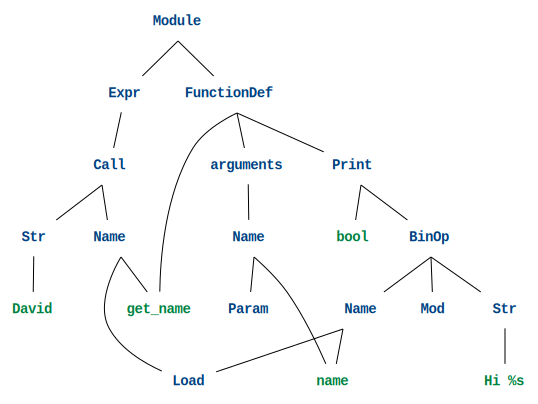

In [71]:
tree = get_ast_repr(ast.parse(program_a))
graph(tree)

In [72]:
get_ast_pairs(tree)

[('Module', 'FunctionDef'),
 ('Module', 'Expr'),
 ('FunctionDef', 'get_name'),
 ('FunctionDef', 'arguments'),
 ('FunctionDef', 'Print'),
 ('Expr', 'Call'),
 ('arguments', 'Name'),
 ('Print', 'BinOp'),
 ('Print', 'bool'),
 ('Call', 'Name'),
 ('Call', 'Str'),
 ('Name', 'name'),
 ('Name', 'Param'),
 ('BinOp', 'Str'),
 ('BinOp', 'Mod'),
 ('BinOp', 'Name'),
 ('Name', 'get_name'),
 ('Name', 'Load'),
 ('Str', 'David'),
 ('Str', 'Hi %s'),
 ('Name', 'name'),
 ('Name', 'Load')]

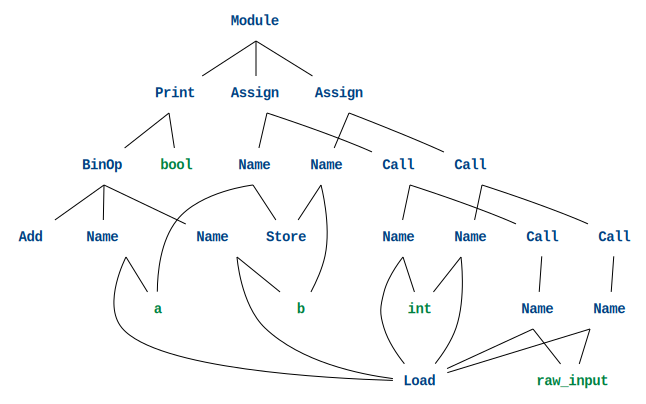

In [73]:
graph(get_ast_repr(ast.parse(program_sum)))

### Utils

In [74]:
# Run another notebook

# http://nbviewer.jupyter.org/gist/minrk/5491090/analysis.ipynb

#import io
#from IPython.nbformat import current

#def execute_notebook(nbfile):
#    with io.open(nbfile) as f:
#        nb = current.read(f, 'json')
#    ip = get_ipython()
#    for cell in nb.worksheets[0].cells:
#        if cell.cell_type != 'code':
#            continue
#        ip.run_cell(cell.input)

# execute_notebook("Tokenize Python programs.ipynb")

# Call the function defined on that notebook:
# get_tokens(program)